# 1. Module import


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: C:\Users\admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# 2. Load Data



In [36]:
df = pd.read_csv('merged_data.csv', encoding='utf-8')

In [37]:
df

,ID,GPU,Index_cellphones,Index_fpt,Index_tgdd,Comment_count,Price,Rating,Rating_count,Series,...,sd_card,storage_extra_slot,storage_type,headphone_jack,thickness,type_c,usb_a,width,Availabe_in,GPU_brand
0,0,nvidia geforce rtx 3050 ti,https://cellphones.com.vn/laptop-gaming-acer-n...,0.0,https://www.thegioididong.com/laptop/acer-nitr...,906,28626333.33,NaN,0,nitro 5 gaming an515 57 74nu nh.qd9sv.001,...,no,yes,ssd,yes,23.90,yes,yes,255.00,3,nvidia
1,1,nvidia geforce mx450,https://cellphones.com.vn/laptop-msi-modern-14...,1.0,https://www.thegioididong.com/laptop/msi-gamin...,400,21259666.67,NaN,0,gaming modern 14 b11sbu 669vn,...,yes,no,ssd,yes,16.90,yes,yes,219.00,3,nvidia
2,2,intel uhd graphics,NaN,2.0,https://www.thegioididong.com/laptop/dell-insp...,322,15294500.00,3.7,18,inspiron 15 3511 p112f001abl,...,yes,yes,ssd,yes,18.90,no,yes,235.50,2,intel
3,3,intel uhd graphics,NaN,4.0,NaN,378,14999000.00,5.0,4,ideapad slim 3 15itl6 82h80040vn,...,yes,yes,ssd,yes,19.90,yes,yes,237.70,1,intel
4,4,intel iris xe graphics,NaN,6.0,NaN,1244,18799000.00,5.0,5,ideapad slim 5 15itl05 82fg00r0vn,...,yes,yes,ssd,yes,17.90,yes,yes,233.13,1,intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,547,amd radeon graphics,https://cellphones.com.vn/surface-laptop-4.html,NaN,NaN,39,26990000.00,NaN,0,surface laptop 4,...,yes,NaN,NaN,yes,14.50,yes,yes,223.00,1,amd
548,548,intel uhd graphics,https://cellphones.com.vn/surface-laptop-go-21...,NaN,NaN,21,14990000.00,NaN,0,surface laptop go 12.4,...,no,NaN,NaN,yes,15.69,yes,yes,205.67,1,intel
549,549,intel uhd graphics,https://cellphones.com.vn/surface-laptop-go-25...,NaN,NaN,76,21590000.00,NaN,0,surface laptop go,...,no,NaN,ssd,yes,15.69,yes,yes,205.67,1,intel
550,550,intel uhd graphics,https://cellphones.com.vn/surface-laptop-pro-7...,NaN,NaN,49,15990000.00,5.0,2,surface pro 7,...,no,NaN,ssd,yes,85.00,no,no,201.00,1,intel


In [38]:
df.shape

(552, 40)

In [39]:
#df.drop(columns=['Unnamed: 0'],inplace=True) #inplace=True, thay đổi sẽ được áp dụng trực tiếp vào DataFrame df mà không tạo ra một bản sao mới
df = df.drop("ID", axis=1) #axis=1 chỉ định việc loại bỏ thực hiện theo chiều cột, còn 0 sẽ thực hiện theo chiều dòng
df = df.drop("Index_cellphones", axis=1)
df = df.drop("Index_fpt", axis=1)
df = df.drop("Index_tgdd", axis=1)
df = df.drop("Series", axis=1)
df = df.drop("cpu_code", axis=1)
df = df.drop("Rating", axis=1)
df = df.drop("Rating_count", axis=1)
df = df.drop("P/N", axis=1)
df = df.drop("hdmi", axis=1)
df = df.drop("Release_year", axis=1)
df = df.drop("backlit_keyboard", axis=1)
df = df.drop("lan", axis=1)
df = df.drop("length", axis=1)
df = df.drop("sd_card", axis=1)
df = df.drop("headphone_jack", axis=1)
df = df.drop("storage_type", axis=1)
df = df.drop("thickness", axis=1)
df = df.drop("type_c", axis=1)
df = df.drop("usb_a", axis=1)
df = df.drop("width", axis=1)
df = df.drop("Availabe_in", axis=1)
df = df.drop("GPU", axis=1)
df = df.drop("Surface", axis=1)
df = df[df['Brand'] != 'fujitsu']

# 3. Handling Missing Data

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 551
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Comment_count       551 non-null    int64  
 1   Price               495 non-null    float64
 2   Brand               551 non-null    object 
 3   cpu_brand           551 non-null    object 
 4   ram_size            551 non-null    int64  
 5   storage_size        551 non-null    int64  
 6   displ_size          551 non-null    float64
 7   displ_rate          551 non-null    int64  
 8   Battery             488 non-null    float64
 9   OS                  547 non-null    object 
 10  displ_resolution    544 non-null    object 
 11  Weight              547 non-null    float64
 12  ram_upgradable      492 non-null    object 
 13  screen_technology   450 non-null    object 
 14  storage_extra_slot  324 non-null    object 
 15  GPU_brand           547 non-null    object 
dtypes: float

In [41]:
df.select_dtypes(include='number').corr()['Price']

Comment_count   -0.193306
Price            1.000000
ram_size         0.825395
storage_size     0.636760
displ_size       0.219696
displ_rate       0.435111
Battery          0.478899
Weight           0.241774
Name: Price, dtype: float64

In [42]:
df.duplicated().sum()# kiểm tra số lượng hàng trùng lặp

1

In [43]:
df.isnull().sum() # tính tổng số lượng giá trị null trong mỗi cột của DataFrame để có thể xử lý giá trị null

Comment_count           0
Price                  56
Brand                   0
cpu_brand               0
ram_size                0
storage_size            0
displ_size              0
displ_rate              0
Battery                63
OS                      4
displ_resolution        7
Weight                  4
ram_upgradable         59
screen_technology     101
storage_extra_slot    227
GPU_brand               4
dtype: int64

In [44]:
df['screen_technology'].fillna(method='ffill', inplace=True)
df['OS'].fillna(method='ffill', inplace=True)
df['Weight'].fillna(method='ffill', inplace=True)
df['ram_upgradable'].fillna(method='bfill', inplace=True)
df['storage_extra_slot'].fillna(method='ffill', inplace=True)
df['GPU_brand'].fillna(method='ffill', inplace=True)
df['Battery'].fillna(df['Battery'].mean(), inplace=True)
df['Price'].fillna(df['Price'].mean(), inplace=True)
df['displ_resolution'].fillna('1920x1080', inplace=True)
df['Price'].fillna(0, inplace=True)

In [45]:
df.isnull().sum()

Comment_count         0
Price                 0
Brand                 0
cpu_brand             0
ram_size              0
storage_size          0
displ_size            0
displ_rate            0
Battery               0
OS                    0
displ_resolution      0
Weight                0
ram_upgradable        0
screen_technology     0
storage_extra_slot    0
GPU_brand             0
dtype: int64

# 4. Preprocessing

In [46]:
df.head()

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_size,displ_rate,Battery,OS,displ_resolution,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand
0,906,28626333.33,acer,intel,8,512,15.6,144,57.000000,windows 10,1920 x 1080,2.20,yes,ips,yes,nvidia
1,400,21259666.67,msi,intel,8,512,14.0,60,39.000000,windows 10,1920 x 1080,1.30,yes,ips,no,nvidia
2,322,15294500.00,dell,intel,4,256,15.6,60,41.000000,windows 10,1920 x 1080,1.70,yes,va,yes,intel
3,378,14999000.00,lenovo,intel,8,512,15.6,60,57.654098,windows 10,1920 x 1080,1.65,yes,led,yes,intel
4,1244,18799000.00,lenovo,intel,16,512,15.6,60,45.000000,windows 10,1920 x 1080,1.66,yes,ips,yes,intel


In [47]:
new = df['displ_resolution'].str.split('x',n=1,expand=True)
#.str.split() để tách chuỗi thành các phần tử dựa trên một ký tự phân cách
# sử dụng ký tự 'x' làm điểm phân cách.
# Tham số n=1 chỉ định rằng chỉ có một sự phân cách xảy ra, giới hạn số lượng cột mới tạo ra là 2.
# expand=True được sử dụng để tạo các cột mới từ các phần tử tách ra.

In [48]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [49]:
df

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_size,displ_rate,Battery,OS,displ_resolution,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,X_res,Y_res
0,906,28626333.33,acer,intel,8,512,15.6,144,57.000000,windows 10,1920 x 1080,2.20,yes,ips,yes,nvidia,1920,1080
1,400,21259666.67,msi,intel,8,512,14.0,60,39.000000,windows 10,1920 x 1080,1.30,yes,ips,no,nvidia,1920,1080
2,322,15294500.00,dell,intel,4,256,15.6,60,41.000000,windows 10,1920 x 1080,1.70,yes,va,yes,intel,1920,1080
3,378,14999000.00,lenovo,intel,8,512,15.6,60,57.654098,windows 10,1920 x 1080,1.65,yes,led,yes,intel,1920,1080
4,1244,18799000.00,lenovo,intel,16,512,15.6,60,45.000000,windows 10,1920 x 1080,1.66,yes,ips,yes,intel,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,39,26990000.00,microsoft,amd,8,256,13.5,60,47.000000,windows 10,2256 x 1504,1.27,no,ips,no,amd,2256,1504
548,21,14990000.00,microsoft,intel,4,64,12.4,60,57.654098,windows 10,1536 x 1024,1.11,no,ips,no,intel,1536,1024
549,76,21590000.00,microsoft,intel,8,256,12.4,60,57.654098,windows 10,1536 x 1024,1.11,no,ips,no,intel,1536,1024
550,49,15990000.00,microsoft,intel,4,128,12.3,60,43.000000,windows 10,2736 x 1824,0.00,no,ips,no,intel,2736,1824


In [50]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['displ_size']).astype('float')
#Tính toán độ phân giải điểm ảnh trên mỗi inch của màn hình, hay còn gọi là "Pixels Per Inch" (PPI).

In [51]:
df

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_size,displ_rate,Battery,OS,displ_resolution,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,X_res,Y_res,ppi
0,906,28626333.33,acer,intel,8,512,15.6,144,57.000000,windows 10,1920 x 1080,2.20,yes,ips,yes,nvidia,1920,1080,141.211998
1,400,21259666.67,msi,intel,8,512,14.0,60,39.000000,windows 10,1920 x 1080,1.30,yes,ips,no,nvidia,1920,1080,157.350512
2,322,15294500.00,dell,intel,4,256,15.6,60,41.000000,windows 10,1920 x 1080,1.70,yes,va,yes,intel,1920,1080,141.211998
3,378,14999000.00,lenovo,intel,8,512,15.6,60,57.654098,windows 10,1920 x 1080,1.65,yes,led,yes,intel,1920,1080,141.211998
4,1244,18799000.00,lenovo,intel,16,512,15.6,60,45.000000,windows 10,1920 x 1080,1.66,yes,ips,yes,intel,1920,1080,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,39,26990000.00,microsoft,amd,8,256,13.5,60,47.000000,windows 10,2256 x 1504,1.27,no,ips,no,amd,2256,1504,200.842560
548,21,14990000.00,microsoft,intel,4,64,12.4,60,57.654098,windows 10,1536 x 1024,1.11,no,ips,no,intel,1536,1024,148.874375
549,76,21590000.00,microsoft,intel,8,256,12.4,60,57.654098,windows 10,1536 x 1024,1.11,no,ips,no,intel,1536,1024,148.874375
550,49,15990000.00,microsoft,intel,4,128,12.3,60,43.000000,windows 10,2736 x 1824,0.00,no,ips,no,intel,2736,1824,267.338436


In [52]:
df.drop(columns=['displ_resolution'],inplace=True)
df.drop(columns=['displ_size','X_res','Y_res'],inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 551
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Comment_count       551 non-null    int64  
 1   Price               551 non-null    float64
 2   Brand               551 non-null    object 
 3   cpu_brand           551 non-null    object 
 4   ram_size            551 non-null    int64  
 5   storage_size        551 non-null    int64  
 6   displ_rate          551 non-null    int64  
 7   Battery             551 non-null    float64
 8   OS                  551 non-null    object 
 9   Weight              551 non-null    float64
 10  ram_upgradable      551 non-null    object 
 11  screen_technology   551 non-null    object 
 12  storage_extra_slot  551 non-null    object 
 13  GPU_brand           551 non-null    object 
 14  ppi                 551 non-null    float64
dtypes: float64(4), int64(4), object(7)
memory usage: 68.9+ KB

# 5. EDA

C:\Users\admin\AppData\Local\Temp\ipykernel_22784\2192852777.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price']) #tạo một đồ thị phân phối (distribution plot) của cột 'Price' trong DataFrame df


<AxesSubplot:xlabel='Price', ylabel='Density'>

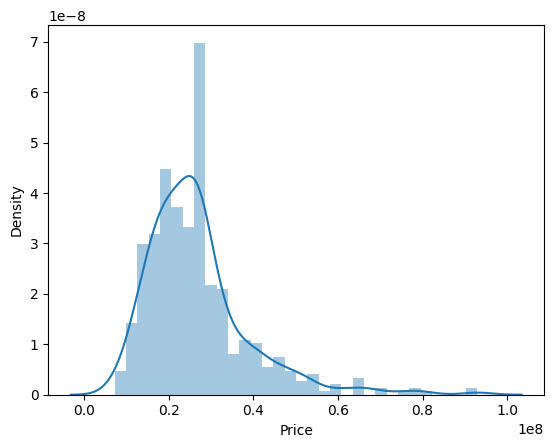

In [56]:
import seaborn as sns
sns.distplot(df['Price']) #tạo một đồ thị phân phối (distribution plot) của cột 'Price' trong DataFrame df

In [57]:
df.head()

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_rate,Battery,OS,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,ppi
0,906,28626333.33,acer,intel,8,512,144,57.000000,windows 10,2.20,yes,ips,yes,nvidia,141.211998
1,400,21259666.67,msi,intel,8,512,60,39.000000,windows 10,1.30,yes,ips,no,nvidia,157.350512
2,322,15294500.00,dell,intel,4,256,60,41.000000,windows 10,1.70,yes,va,yes,intel,141.211998
3,378,14999000.00,lenovo,intel,8,512,60,57.654098,windows 10,1.65,yes,led,yes,intel,141.211998
4,1244,18799000.00,lenovo,intel,16,512,60,45.000000,windows 10,1.66,yes,ips,yes,intel,141.211998


In [58]:

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
cmap = mpl.colormaps.get_cmap('Spectral')
 
import pandas as pd
from pandas.api.types import is_numeric_dtype
 
import warnings
warnings.filterwarnings('ignore')
 
import scipy
from scipy import stats
from scipy.stats import chi2_contingency, entropy, chi2

AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

In [473]:
numeric_attributes = df.select_dtypes(include=[np.number])
print(numeric_attributes.columns)
print('Number of numeric attributes: {}'.format(len(numeric_attributes.columns)))


Index(['Comment_count', 'Price', 'ram_size', 'storage_size', 'displ_rate',
       'Battery', 'Weight', 'ppi'],
      dtype='object')
Number of numeric attributes: 8


In [474]:
categorical_attributes = df.select_dtypes(include=[object])
print(categorical_attributes.columns)
print('Number of categorical attributes: {}'.format(len(categorical_attributes.columns)))

Index(['Brand', 'cpu_brand', 'OS', 'ram_upgradable', 'screen_technology',
       'storage_extra_slot', 'GPU_brand'],
      dtype='object')
Number of categorical attributes: 7


In [475]:
def plot_statistics(df: pd.DataFrame, bins = 50, title = None,discrete=False):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex= True, gridspec_kw={"height_ratios": (.15, .85)})
    fig.set_figheight(5)
    fig.set_figwidth(7)
    ax_box.set_title(title)
    if not discrete:
        sns.boxplot(df, ax=ax_box, showmeans=True, meanprops={"marker":"o",
                                                                    "markerfacecolor":"white",
                                                                    "markeredgecolor":"black",
                                                                    "markersize":"10"})
        sns.distplot(df, ax=ax_hist, bins = bins)
        ax_box.get_xaxis().set_visible(False)
        sns.despine(ax=ax_box, left=True)
        ax_box.set_xlabel('')
    else:
        sns.countplot(df.sort_values(),ax=ax_hist)
    sns.despine(ax=ax_hist)

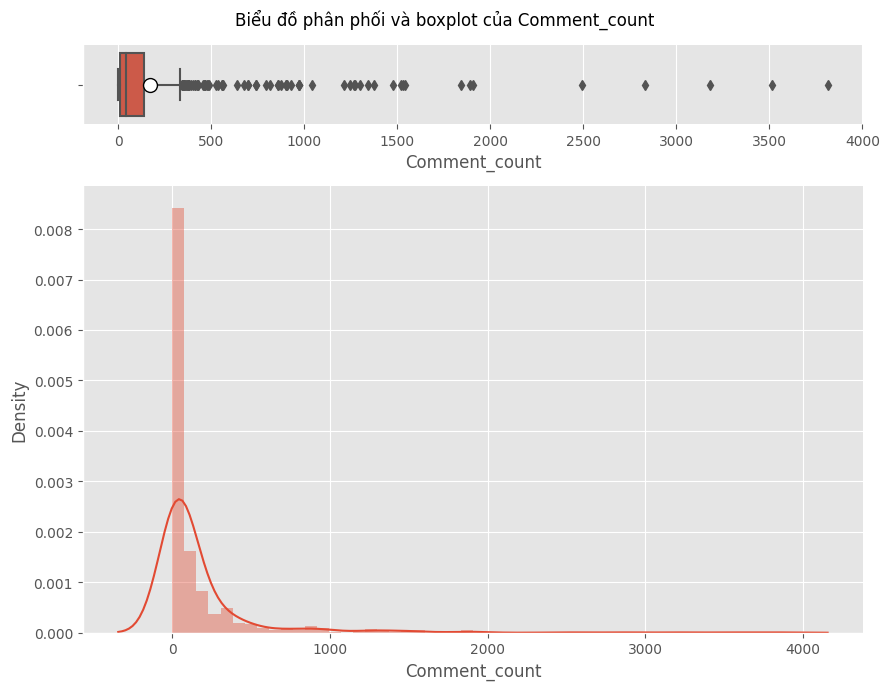

In [476]:
def plot_statistics(df: pd.DataFrame, bins=50, title=None, discrete=False):
    fig, axs = plt.subplots(2, figsize=(9, 7), gridspec_kw={"height_ratios": (.15, .85)})
    fig.suptitle(title)
    if not discrete:
        sns.boxplot(x=df, orient='h', ax=axs[0], showmeans=True, meanprops={"marker": "o",
                                                                              "markerfacecolor": "white",
                                                                              "markeredgecolor": "black",
                                                                              "markersize": "10"})
        sns.despine(ax=axs[0], bottom=True)
        axs[0].set_ylabel('')
        sns.distplot(df, ax=axs[1], bins=bins)
    else:
        sns.countplot(df.sort_values(), ax=axs[1])
    sns.despine(ax=axs[1])
    plt.tight_layout()
    plt.show()
 
# Sử dụng hàm plot_statistics() với dữ liệu của bạn
# Ví dụ: df là DataFrame chứa dữ liệu 'Comment_count'
plot_statistics(df['Comment_count'], title='Biểu đồ phân phối và boxplot của Comment_count')

count    5.510000e+02
mean     2.675502e+07
std      1.227696e+07
min      7.290000e+06
25%      1.874600e+07
50%      2.499000e+07
75%      3.007675e+07
max      9.299000e+07
Name: Price, dtype: float64


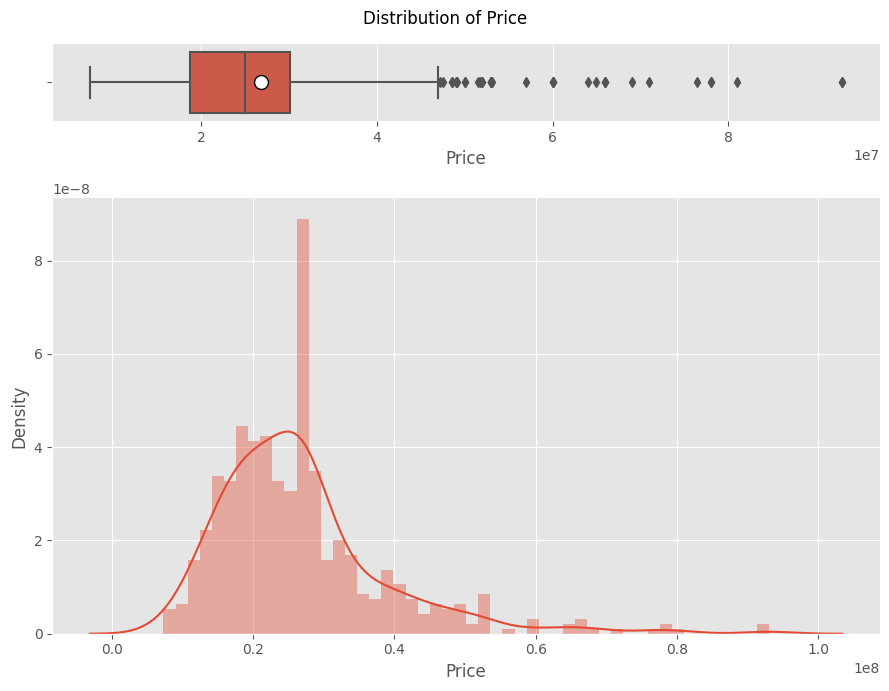

In [477]:
#Summarize some statistics information of Price and plot the distribution
print(df['Price'].describe())
#kurtosis and
plot_statistics(df['Price'],title='Distribution of Price')

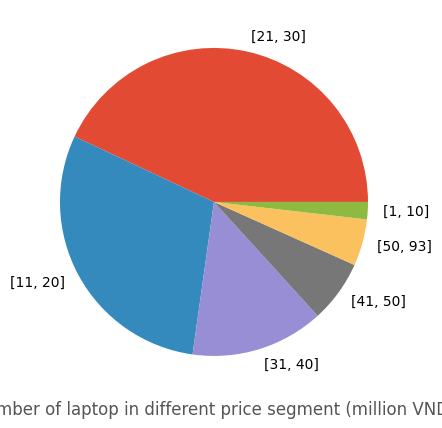

In [478]:
# low_price = main_data['Price'] <= 15000000
# avr_price = (main_data['Price'] > 15000000) & (main_data['Price'] <= 30000000)
# high_price = main_data['Price'] > 30000000
# main_data['price_segment'] = np.select([low_price, avr_price, high_price],['low','avr','high'], default=np.nan)
# print('low_price:  {} \navr_price:  {} \nhigh_price: {}'.format(len(low_price), len(avr_price), len(high_price)))
 
range_lower = list(range(-10, 60, 10))
range_upper = list(range(0, 60, 10))
labels = []
for i, j in zip(range_lower, range_upper):
    labels.append(str([i + 1, j]))
range_lower.append(93)
labels.append(str([50,93]))
 
df['Price_range'] = pd.cut(df["Price"],
       bins=[i*1000000 for i in range_lower],
       labels=labels)
df['Price_range'].value_counts(dropna=False).plot(kind='pie',figsize=(7,5),ylabel="")
plt.xlabel("Number of laptop in different price segment (million VND)")
# plt.ylabel("Price range (million VND)")
plt.show()

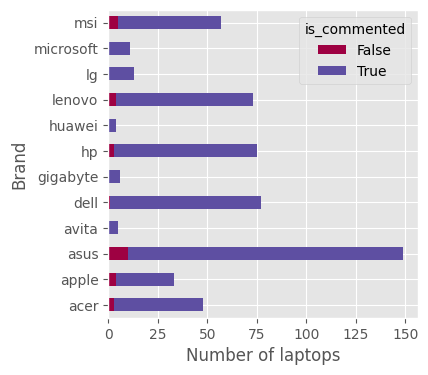

In [479]:
df['is_commented'] = df['Comment_count'] > 0
df.groupby('Brand')['is_commented'].value_counts().unstack().plot(kind='barh', stacked=True, figsize=(4, 4), colormap=cmap)
plt.xlabel('Number of laptops')
# plt.title('Count the number of laptops receiving comments from customers')
plt.show()

Text(0.5, 1.0, 'Spearman correlation matrix of numerical attributes')

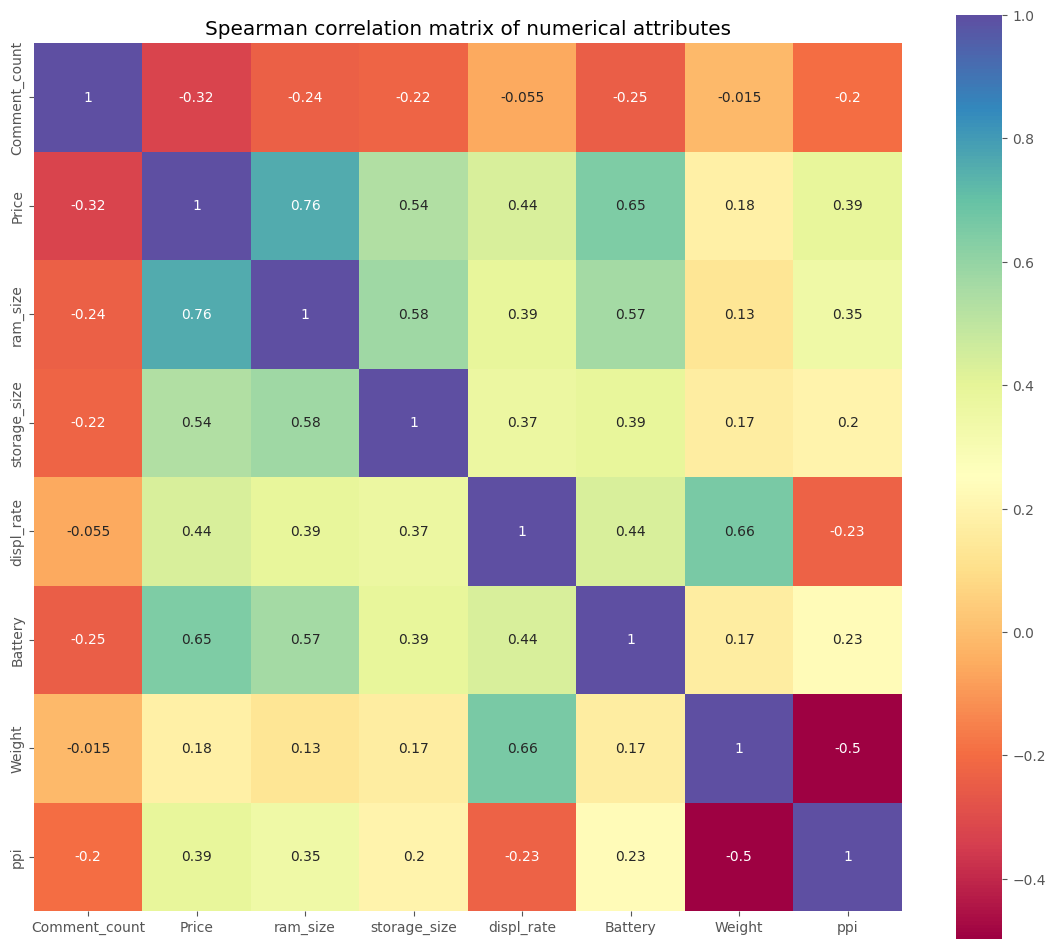

In [480]:
normalized_numeric_attributes = (numeric_attributes - numeric_attributes.mean())/numeric_attributes.std()
correlation = normalized_numeric_attributes.corr(method='spearman')
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation, cmap=cmap, square = True, annot = True)
plt.title("Spearman correlation matrix of numerical attributes")

Text(0.5, 1.0, 'Pearson correlation matrix of numerical attributes')

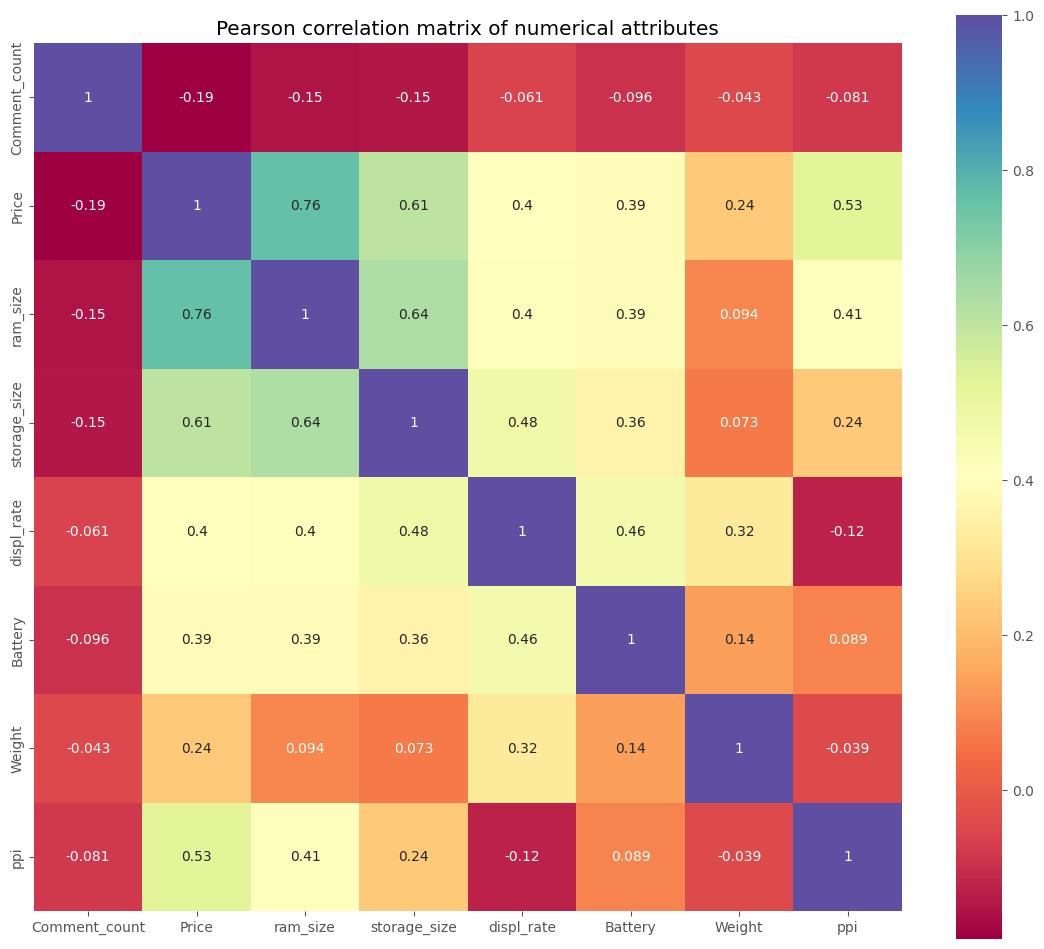

In [481]:
normalized_numeric_attributes = (numeric_attributes - numeric_attributes.mean())/numeric_attributes.std()
correlation = normalized_numeric_attributes.corr()
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation, cmap=cmap, square = True, annot = True)
plt.title("Pearson correlation matrix of numerical attributes")

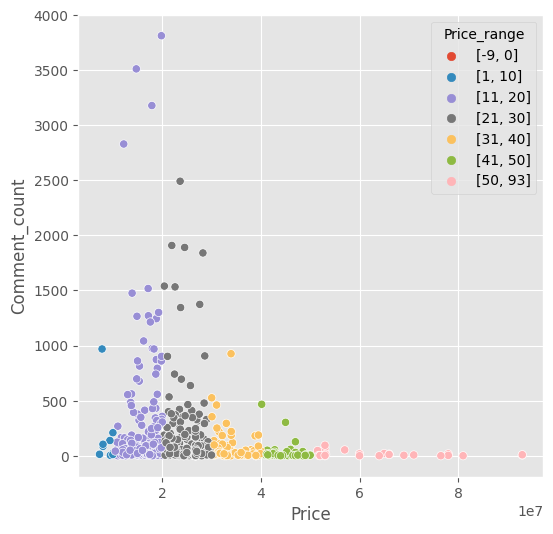

In [482]:
plt.subplots(figsize=(6, 6))
sns.scatterplot(x='Price', y='Comment_count', data=df, hue='Price_range')
# plt.ylim([0,400])
plt.show()

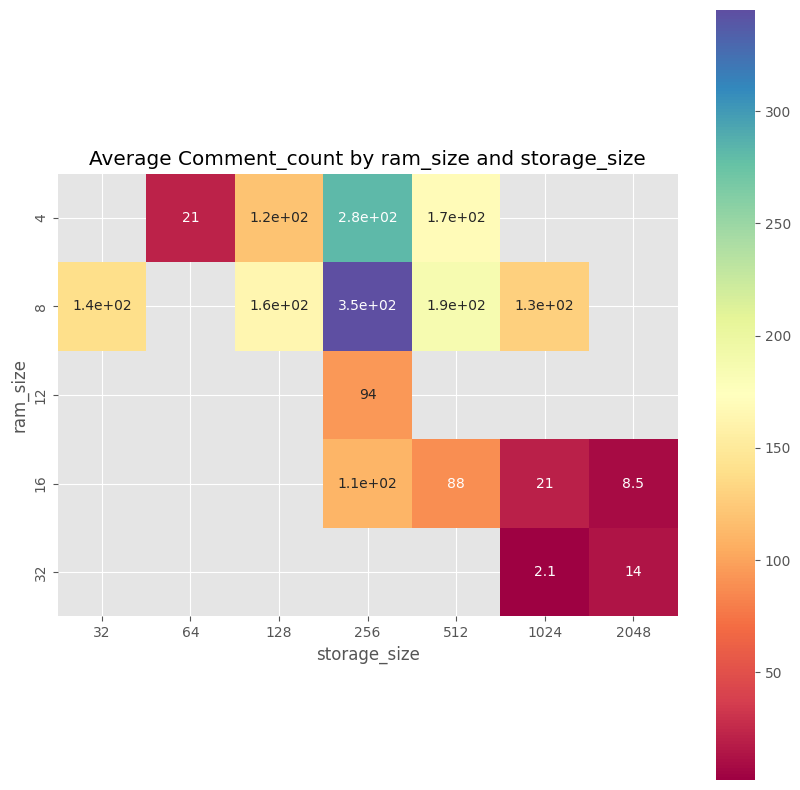

In [484]:
# sns.relplot(data=main_data, x="ram_size", y="storage_size",size="Comment_count",hue="Comment_count",palette=cmap,s=0.1,alpha=.5)
plt.figure(figsize=(10,10))
sns.heatmap(square=True,annot=True,data=df.groupby(['ram_size','storage_size'])['Comment_count'].mean().unstack(),cmap=cmap)
# plt.xlim([200,300])
# plt.ylim([300,400])
plt.title("Average Comment_count by ram_size and storage_size")
plt.show()

In [485]:
def plot_cate(col_name):
    # counter = categorical_attributes[col_name].value_counts()
    # sns.barplot(counter.values, counter.index)
 
    sns.countplot(y=df[col_name].sort_values())
    plt.xlabel('Number of laptops')
    plt.ylabel(col_name)
    plt.title('Market share of ' + col_name)
 
 
def plot_boxplot(x, y):
    sns.boxplot(y=y, x=x, data=df, showmeans=True, meanprops={"marker":"o",
                                                                    "markerfacecolor":"white",
                                                                    "markeredgecolor":"black",
                                                                    "markersize":"10"})

In [486]:
from scipy.stats import f_oneway
 
def get_anova_pvalue(cate_col, num_col):
    if cate_col == 'Price_range':
        uniques = df[cate_col].unique()[:-1]
    else:
        uniques = df[cate_col].unique()
    return f_oneway(*[df[df[cate_col] == cate][num_col] for cate in uniques]).pvalue

In [487]:
from statsmodels.formula.api import ols
 
def t_pairwise(cate_col, num_col):
 
    mod = ols('{} ~ {}'.format(num_col, cate_col),
                    data=df).fit()
 
    pair_t = mod.t_test_pairwise(cate_col)
    return pair_t.result_frame

In [488]:
cate_cols = categorical_attributes.columns.to_list() + ['Price_range']
anova_pvalues = []
num_categories = []
for c in cate_cols:
    uniques = df[c].unique()
    num_categories.append(len(uniques) - 1 if 'NaN' in uniques or np.nan in uniques else len(uniques))
 
for col in cate_cols:
    anova_pvalues.append(get_anova_pvalue(col, 'Comment_count'))
 
cate_cols = ['Brand', 'cpu_brand', 'OS', 'ram_upgradable', 'screen_technology',
       'storage_extra_slot', 'GPU_brand', 'Price range']
 
summary_table = pd.DataFrame({'Analysis variable': cate_cols, '#categories': num_categories, 'ANOVA p-value': anova_pvalues}).sort_values('ANOVA p-value')
summary_table['Reject hypothesis'] = summary_table['ANOVA p-value'] <= 0.05
summary_table

,Analysis variable,#categories,ANOVA p-value,Reject hypothesis
7,Price range,6,0.000009,True
4,screen_technology,6,0.012639,True
3,ram_upgradable,2,0.019977,True
0,Brand,12,0.180466,False
5,storage_extra_slot,2,0.185539,False
6,GPU_brand,4,0.419306,False
1,cpu_brand,3,0.498445,False
2,OS,4,0.649979,False


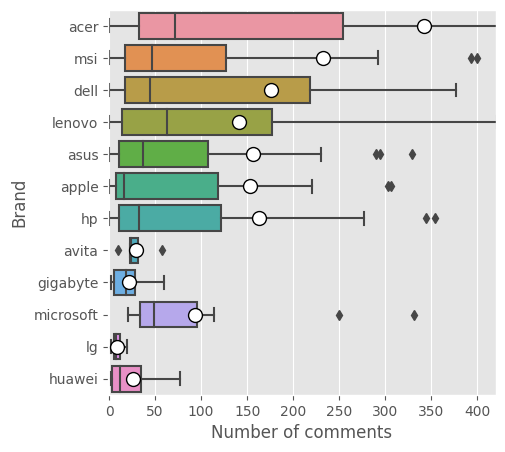

In [489]:
plt.subplots(figsize=(5, 5))
sns.boxplot(y='Brand', x="Comment_count", data=df, showmeans=True, meanprops={"marker":"o",
                                                                    "markerfacecolor":"white",
                                                                    "markeredgecolor":"black",
                                                                    "markersize":"10"})
plt.xlim([-1, 420])
plt.xlabel('Number of comments')
plt.show()

In [490]:
t_pairwise('Price_range', "Comment_count").sort_values('pvalue-hs')[['pvalue-hs', 'reject-hs']].reset_index().rename(columns={'pvalue-hs': 'T-t pvalue', 'reject-hs': 'Reject hs', 'index': 'Pairs (million dongs)'} ).iloc[1:4]

,Pairs (million dongs),T-t pvalue,Reject hs
1,"[31, 40]-[11, 20]",0.001593,True
2,"[21, 30]-[11, 20]",0.007062,True
3,"[41, 50]-[11, 20]",0.007062,True


In [491]:
df.groupby('Price_range').agg({'Brand':'count', 'Comment_count':'mean'}).reset_index().rename(columns={'Brand': 'Number of laptops', 'Price_range': 'Price range', 'Comment_count': 'Average #comments'}).iloc[1:]

,Price range,Number of laptops,Average #comments
1,"[1, 10]",10,157.400000
2,"[11, 20]",164,298.975610
3,"[21, 30]",237,155.274262
4,"[31, 40]",77,81.415584
5,"[41, 50]",36,37.888889
6,"[50, 93]",27,16.962963


In [492]:
pd.set_option('display.max_rows', 14)
t_pairwise('Brand', 'Comment_count')[['pvalue-hs', 'reject-hs']].reset_index().rename(columns={'pvalue-hs': 'T-t pvalue', 'reject-hs': 'Reject hs', 'index': 'Pairs of brand'} )

,Pairs of brand,T-t pvalue,Reject hs
0,apple-acer,0.909937,False
1,asus-acer,0.315407,False
2,avita-acer,0.997483,False
3,dell-acer,0.802137,False
4,gigabyte-acer,0.983948,False
...,...,...,...
61,microsoft-lenovo,1.000000,False
62,msi-lenovo,0.999991,False
63,microsoft-lg,1.000000,False
64,msi-lg,0.985965,False


In [493]:
highest_comment_count = df.nlargest(50, 'Comment_count')
rest_comment_count = df.drop(highest_comment_count.index)
highest_comment_count.describe()

,Comment_count,Price,ram_size,storage_size,displ_rate,Battery,Weight,ppi
count,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1171.240000,2.033219e+07,7.600000,407.040000,79.680000,52.044000,1.721360,151.478150
std,792.673095,6.150297e+06,2.710524,131.071714,35.528339,25.792042,0.340692,20.878697
min,456.000000,7.799000e+06,4.000000,128.000000,60.000000,33.000000,1.100000,135.094211
25%,647.000000,1.560246e+07,8.000000,256.000000,60.000000,41.000000,1.444500,141.211998
50%,904.000000,1.899675e+07,8.000000,512.000000,60.000000,43.500000,1.700000,141.211998
75%,1366.750000,2.370133e+07,8.000000,512.000000,60.000000,57.000000,1.935000,157.350512
max,3813.000000,4.016300e+07,16.000000,512.000000,144.000000,200.000000,2.460000,226.983005


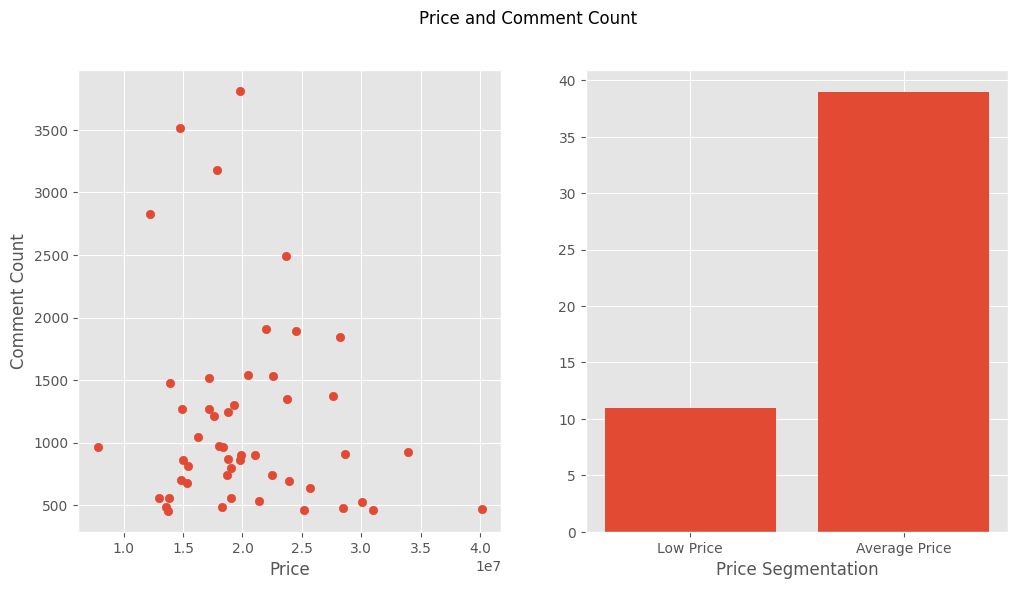

In [494]:
y = highest_comment_count['Comment_count']
x = highest_comment_count['Price']
vl_count = [len(x[x < 15000000]), len(x[x > 15000000])]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Chỉ sử dụng 1 hàng và 2 cột
 
ax[0].scatter(x, y)
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Comment Count')
 
ax[1].bar(['Low Price', 'Average Price'], vl_count)
ax[1].set_xlabel('Price Segmentation')
 
fig.suptitle('Price and Comment Count')
plt.show()

In [495]:
cols = numeric_attributes.columns

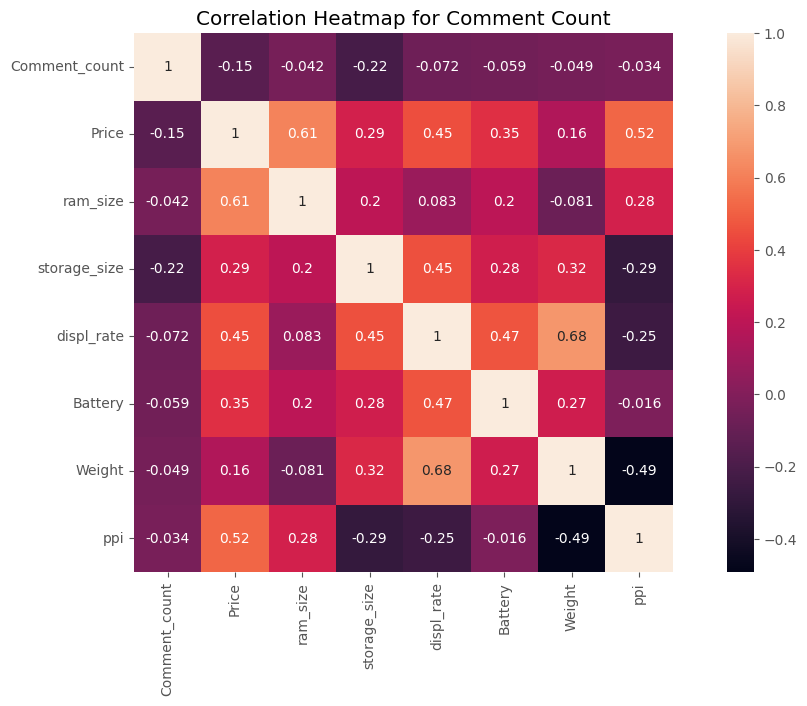

In [496]:

correlation_att = highest_comment_count[cols]  # cols là danh sách các cột bạn quan tâm
normalized_correlation_att = (correlation_att - correlation_att.mean()) / correlation_att.std()
correlation = normalized_correlation_att.corr()
 
# Vẽ heatmap cho 'Comment Count'
plt.figure(figsize=(14, 7))
sns.heatmap(correlation, square=True, annot=True)
plt.title('Correlation Heatmap for Comment Count')
plt.show()

Text(0.5, 1.0, 'Storage Size')

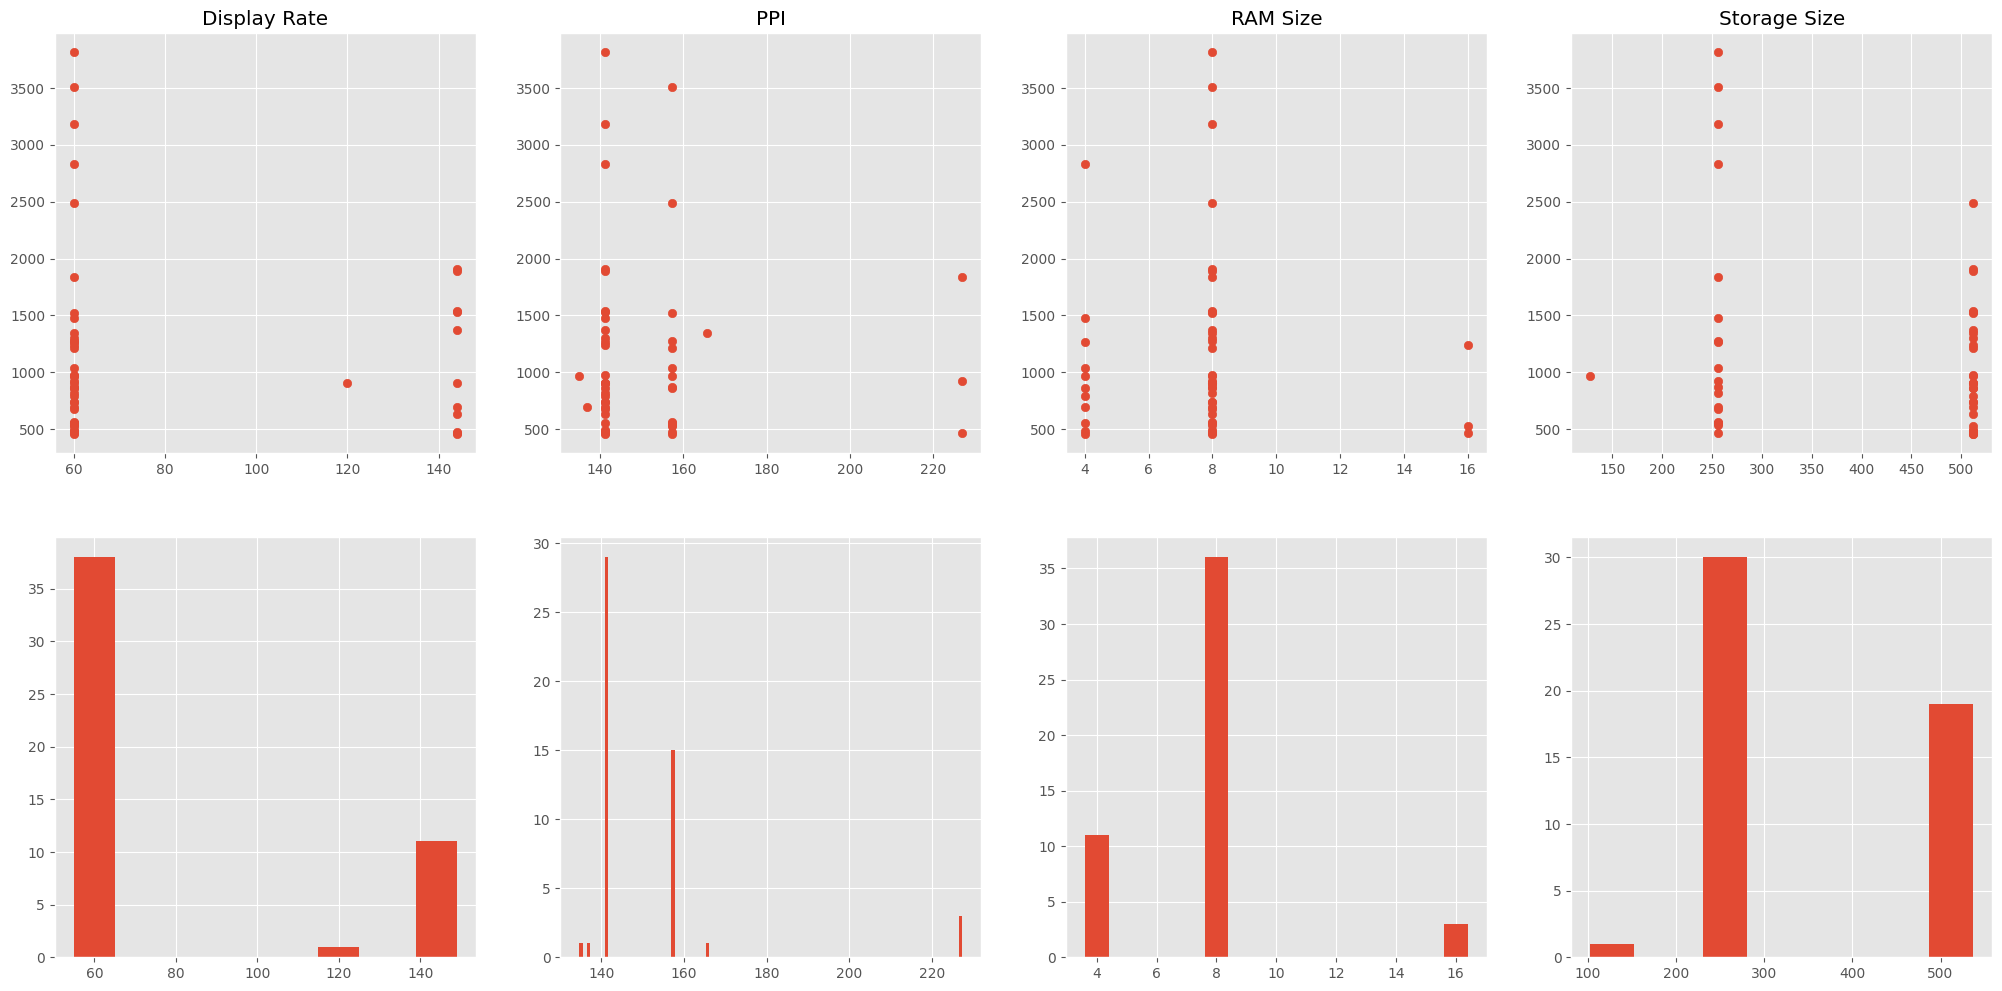

In [497]:
y = highest_comment_count['Comment_count']
x = highest_comment_count['displ_rate']
fig, ax = plt.subplots(2, 4, figsize = (25,12))
ax[0,0].scatter(x, y)
ax[1,0].bar(x.unique(), x.value_counts(), width=10 )
 
y = highest_comment_count['Comment_count']
x = highest_comment_count['ppi']
ax[0,1].scatter(x, y)
ax[1,1].bar(x.unique(), x.value_counts())
 
y = highest_comment_count['Comment_count']
x = highest_comment_count['ram_size']
ax[0,2].scatter(x, y)
ax[1,2].bar(x.unique(), x.value_counts())
 
y = highest_comment_count['Comment_count']
x = highest_comment_count['storage_size']
ax[0,3].scatter(x, y)
ax[1,3].bar(x.unique(), x.value_counts(), width=50)
 
 
ax[0,0].set_title('Display Rate')
ax[0,1].set_title('PPI')
ax[0,2].set_title('RAM Size')
ax[0,3].set_title('Storage Size')

In [498]:
highest_comment_count = df.nlargest(50, 'Comment_count')
rest_comment_count = df.drop(highest_comment_count.index)
highest_comment_count.describe()

,Comment_count,Price,ram_size,storage_size,displ_rate,Battery,Weight,ppi
count,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1171.240000,2.033219e+07,7.600000,407.040000,79.680000,52.044000,1.721360,151.478150
std,792.673095,6.150297e+06,2.710524,131.071714,35.528339,25.792042,0.340692,20.878697
min,456.000000,7.799000e+06,4.000000,128.000000,60.000000,33.000000,1.100000,135.094211
25%,647.000000,1.560246e+07,8.000000,256.000000,60.000000,41.000000,1.444500,141.211998
50%,904.000000,1.899675e+07,8.000000,512.000000,60.000000,43.500000,1.700000,141.211998
75%,1366.750000,2.370133e+07,8.000000,512.000000,60.000000,57.000000,1.935000,157.350512
max,3813.000000,4.016300e+07,16.000000,512.000000,144.000000,200.000000,2.460000,226.983005


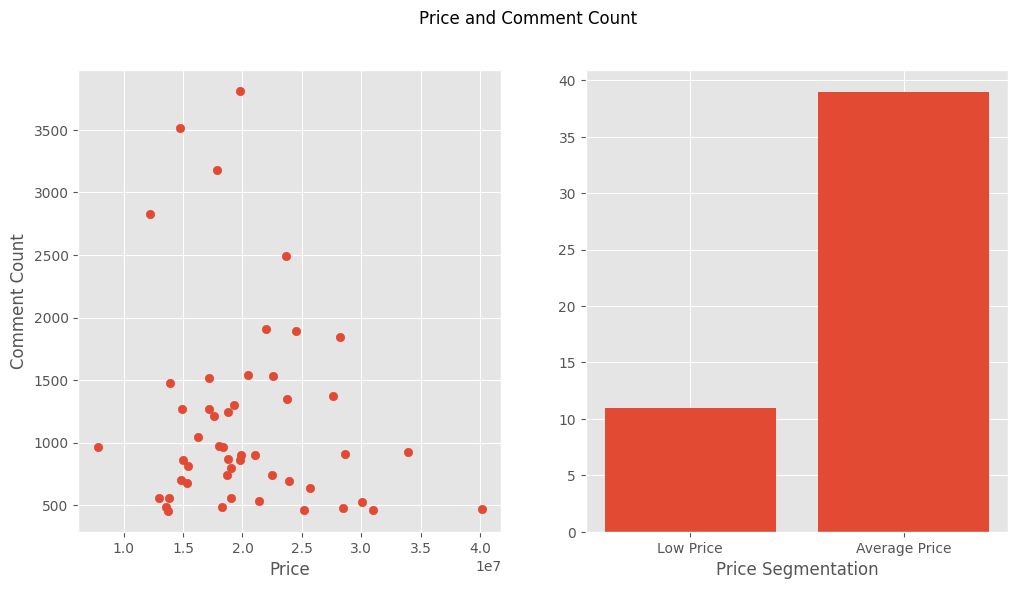

In [499]:
y = highest_comment_count['Comment_count']
x = highest_comment_count['Price']
vl_count = [len(x[x < 15000000]), len(x[x > 15000000])]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Chỉ sử dụng 1 hàng và 2 cột
 
ax[0].scatter(x, y)
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Comment Count')
 
ax[1].bar(['Low Price', 'Average Price'], vl_count)
ax[1].set_xlabel('Price Segmentation')
 
fig.suptitle('Price and Comment Count')
plt.show()

In [500]:
df['storage_extra_slot'] = df['storage_extra_slot'].map({'yes': 1, 'no': 0})
df['ram_upgradable'] = df['ram_upgradable'].map({'yes': 1, 'no': 0})

In [501]:
df.select_dtypes(include='number').corr()['Price']

Comment_count        -0.191864
Price                 1.000000
ram_size              0.764426
storage_size          0.606403
displ_rate            0.404325
Battery               0.388700
Weight                0.236148
ram_upgradable       -0.165101
storage_extra_slot   -0.106075
ppi                   0.527912
Name: Price, dtype: float64

<Axes: >

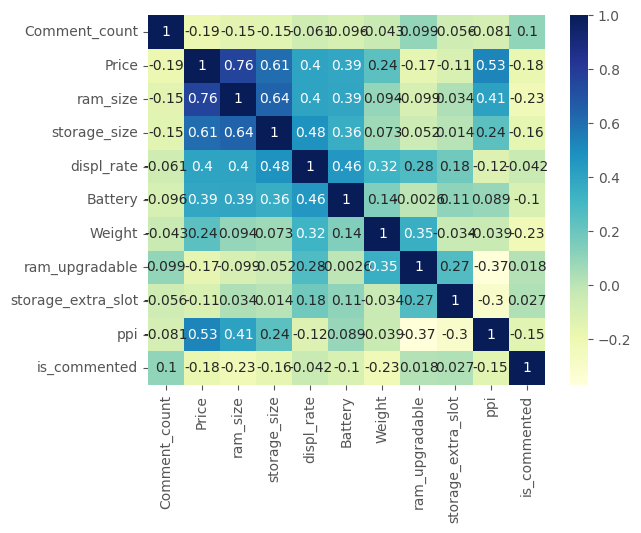

In [502]:
# Explicitly specifying numeric_only=True to avoid the warning
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
#annot=True hiển thị giá trị của mỗi ô trong biểu đồ. Giá trị của mỗi ô thể hiện mức độ tương quan giữa hai biến
#cmap = "YlGnBu"  xanh sáng sẽ được sử dụng cho các giá trị tương quan cao, trong khi màu xanh lá cây và xanh dương sẽ được sử dụng cho các giá trị tương quan thấp hơn

Giá trị dương: Chỉ ra sự tương quan thuận, tức là khi một biến tăng, biến còn lại cũng tăng. Một giá trị dương lớn hơn sẽ chỉ ra một mức độ tương quan mạnh hơn giữa hai biến.

Giá trị âm: Chỉ ra sự tương quan nghịch, tức là khi một biến tăng, biến còn lại giảm. Một giá trị âm lớn hơn sẽ chỉ ra một mức độ tương quan mạnh hơn giữa hai biến.

Biểu đồ heatmap sử dụng các màu sắc để đại diện cho các giá trị tương quan, trong đó các giá trị dương thường được hiển thị bằng màu sáng hơn (ví dụ: màu xanh lá cây hoặc màu vàng) và các giá trị âm thường được hiển thị bằng màu tối hơn (ví dụ: màu xanh đậm hoặc màu tím)

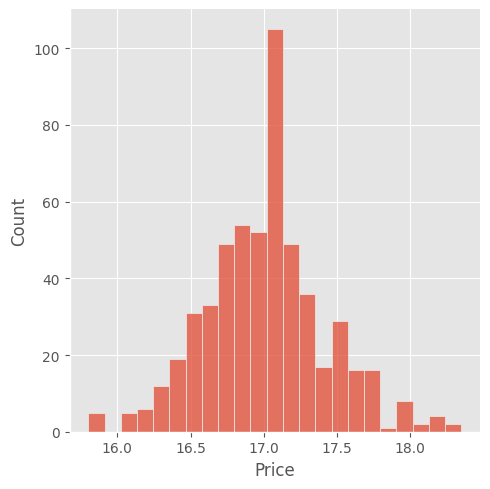

In [503]:
sns.displot(np.log(df['Price']))

In [504]:
df = df.drop("Price_range", axis=1)
df = df.drop("is_commented", axis=1)
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

#sử dụng hàm 'np.log' từ thư viện NumPy để tính logarit tự nhiên của các giá trị trong cột 'Price_euros'. Điều này thường được thực hiện khi giá trị đầu ra có phân phối không đồng đều và áp dụng logarit có thể giúp đưa dữ liệu
# về phân phối gần hơn với phân phối chuẩn và giúp mô hình học tốt hơn.

In [505]:
X

,Comment_count,Brand,cpu_brand,ram_size,storage_size,displ_rate,Battery,OS,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,ppi
0,906,acer,intel,8,512,144,57.000000,windows 10,2.20,1,ips,1,nvidia,141.211998
1,400,msi,intel,8,512,60,39.000000,windows 10,1.30,1,ips,0,nvidia,157.350512
2,322,dell,intel,4,256,60,41.000000,windows 10,1.70,1,va,1,intel,141.211998
3,378,lenovo,intel,8,512,60,57.654098,windows 10,1.65,1,led,1,intel,141.211998
4,1244,lenovo,intel,16,512,60,45.000000,windows 10,1.66,1,ips,1,intel,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,39,microsoft,amd,8,256,60,47.000000,windows 10,1.27,0,ips,0,amd,200.842560
548,21,microsoft,intel,4,64,60,57.654098,windows 10,1.11,0,ips,0,intel,148.874375
549,76,microsoft,intel,8,256,60,57.654098,windows 10,1.11,0,ips,0,intel,148.874375
550,49,microsoft,intel,4,128,60,43.000000,windows 10,0.00,0,ips,0,intel,267.338436


In [506]:
y

0      17.169838
1      16.872322
2      16.543004
3      16.523494
4      16.749314
         ...    
547    17.110977
548    16.522894
549    16.887741
550    16.587474
551    17.033986
Name: Price, Length: 551, dtype: float64

In [507]:
y.sort_values(ascending=False)

17     18.348003
544    18.348003
331    18.209836
79     18.172091
318    18.172091
         ...    
357    15.893701
392    15.893701
51     15.869506
300    15.802014
391    15.802014
Name: Price, Length: 551, dtype: float64

In [508]:
df

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_rate,Battery,OS,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,ppi
0,906,28626333.33,acer,intel,8,512,144,57.000000,windows 10,2.20,1,ips,1,nvidia,141.211998
1,400,21259666.67,msi,intel,8,512,60,39.000000,windows 10,1.30,1,ips,0,nvidia,157.350512
2,322,15294500.00,dell,intel,4,256,60,41.000000,windows 10,1.70,1,va,1,intel,141.211998
3,378,14999000.00,lenovo,intel,8,512,60,57.654098,windows 10,1.65,1,led,1,intel,141.211998
4,1244,18799000.00,lenovo,intel,16,512,60,45.000000,windows 10,1.66,1,ips,1,intel,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,39,26990000.00,microsoft,amd,8,256,60,47.000000,windows 10,1.27,0,ips,0,amd,200.842560
548,21,14990000.00,microsoft,intel,4,64,60,57.654098,windows 10,1.11,0,ips,0,intel,148.874375
549,76,21590000.00,microsoft,intel,8,256,60,57.654098,windows 10,1.11,0,ips,0,intel,148.874375
550,49,15990000.00,microsoft,intel,4,128,60,43.000000,windows 10,0.00,0,ips,0,intel,267.338436


In [509]:
# Explicitly specifying numeric_only=True to avoid the warning
target_correlations = df.corr(numeric_only=True)['Price'].apply(abs).sort_values().to_frame()

In [510]:
target_correlations 

,Price
storage_extra_slot,0.106075
ram_upgradable,0.165101
Comment_count,0.191864
Weight,0.236148
Battery,0.388700
displ_rate,0.404325
ppi,0.527912
storage_size,0.606403
ram_size,0.764426
Price,1.000000


# 7. Machine Learning Modeling

In [511]:
from sklearn.model_selection import train_test_split 
# Chia dữ liệu thành 60% tập huấn luyện, 20% tập kiểm tra, 20% tập validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=2)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2)

In [512]:
X_train

,Comment_count,Brand,cpu_brand,ram_size,storage_size,displ_rate,Battery,OS,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,ppi
369,71,asus,intel,8,512,60,42.000000,windows 10,1.500,0,ips,0,intel,157.350512
170,1518,msi,amd,8,512,60,65.000000,windows 10,1.300,1,led,1,amd,157.350512
148,460,acer,amd,8,512,144,57.000000,windows 10,2.200,1,ips,1,nvidia,141.211998
29,19,msi,intel,16,512,144,150.000000,windows 10,1.693,1,ips,1,nvidia,141.211998
215,3,lg,intel,16,512,60,80.000000,windows 10,1.350,0,ips,1,intel,177.580821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,16,asus,intel,4,128,60,57.654098,windows 10,1.050,0,tn,1,intel,135.094211
535,6,msi,intel,8,512,60,52.000000,windows 10,1.290,0,ips,1,nvidia,157.350512
494,0,lenovo,intel,8,512,165,60.000000,windows 10,2.400,1,ips,1,nvidia,141.211998
528,0,msi,intel,8,512,60,52.000000,windows 10,1.300,1,ips,0,nvidia,157.350512


In [513]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error


In [514]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
# from xgboost import XGBRegressor

In [515]:
def is_invalid_string(value):
    try:
        float(value)
        return False
    except ValueError:
        return True

# Áp dụng hàm kiểm tra cho từng phần tử trong DataFrame
invalid_values = df.applymap(is_invalid_string)

# Kiểm tra cột nào chứa giá trị chuỗi không hợp lệ
invalid_columns = invalid_values.any()
print(invalid_columns)

Comment_count         False
Price                 False
Brand                  True
cpu_brand              True
ram_size              False
                      ...  
ram_upgradable        False
screen_technology      True
storage_extra_slot    False
GPU_brand              True
ppi                   False
Length: 15, dtype: bool


In [516]:
X

,Comment_count,Brand,cpu_brand,ram_size,storage_size,displ_rate,Battery,OS,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,ppi
0,906,acer,intel,8,512,144,57.000000,windows 10,2.20,1,ips,1,nvidia,141.211998
1,400,msi,intel,8,512,60,39.000000,windows 10,1.30,1,ips,0,nvidia,157.350512
2,322,dell,intel,4,256,60,41.000000,windows 10,1.70,1,va,1,intel,141.211998
3,378,lenovo,intel,8,512,60,57.654098,windows 10,1.65,1,led,1,intel,141.211998
4,1244,lenovo,intel,16,512,60,45.000000,windows 10,1.66,1,ips,1,intel,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,39,microsoft,amd,8,256,60,47.000000,windows 10,1.27,0,ips,0,amd,200.842560
548,21,microsoft,intel,4,64,60,57.654098,windows 10,1.11,0,ips,0,intel,148.874375
549,76,microsoft,intel,8,256,60,57.654098,windows 10,1.11,0,ips,0,intel,148.874375
550,49,microsoft,intel,4,128,60,43.000000,windows 10,0.00,0,ips,0,intel,267.338436


### KNN

In [520]:
from sklearn.metrics import r2_score, mean_absolute_error


step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [1, 2, 7, 10, 12])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3, metric='manhattan')

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.6470553117764285
MAE: 0.2001298777674947


In [521]:
from sklearn.model_selection import cross_val_score
# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu X
X_transformed = column_transformer.fit_transform(X)

# Tạo mô hình kNN với số hàng xóm là 3
knn_model = KNeighborsRegressor(n_neighbors=3)

# Áp dụng cross-validation và tính R2 score trên 5 fold
cv_scores = cross_val_score(knn_model, X_transformed, y, cv=5, scoring='r2')

# In ra các kết quả cross-validation
print("Cross-validation scores (R2 for each fold):", cv_scores)
print("Mean R2 score:", cv_scores.mean())

Cross-validation scores (R2 for each fold): [0.47221139 0.39590289 0.33211899 0.45793866 0.516602  ]
Mean R2 score: 0.4349547869578111


In [523]:
# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu X
X_train_transformed = column_transformer.fit_transform(X_train)
# Áp dụng chuyển đổi trên dữ liệu kiểm tra
X_val_transformed = column_transformer.transform(X_val)
# Tìm kiếm giá trị tối ưu cho siêu tham số k
best_score = -float('inf')
best_k = None

for k in range(1, 10):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    # cv_scores = cross_val_score(knn_model, X_train_transformed, y_train, cv=5, scoring='r2')
    # mean_score = cv_scores.mean()
    y_val_pred = knn_model.fit(X_train_transformed, y_train).predict(X_val_transformed)
    val_r2 = r2_score(y_val, y_val_pred)

    print("k:", k, "   R2:", val_r2)
    
    if test_r2 > best_score:
        best_score = val_r2
        best_k = k

print("Best k:", best_k)
print("Best R2 score:", best_score)

k: 1    R2: 0.23122634628818406
k: 2    R2: 0.3739825901297963
k: 3    R2: 0.38630950711100664
k: 4    R2: 0.3842987240815017
k: 5    R2: 0.3687231849515493
k: 6    R2: 0.3995804156652656
k: 7    R2: 0.42651589855187344
k: 8    R2: 0.447125332445654
k: 9    R2: 0.45607761616278086
Best k: 9
Best R2 score: 0.45607761616278086


k: 1    R2: 0.23122634628818406
k: 2    R2: 0.3739825901297963
k: 3    R2: 0.38630950711100664
k: 4    R2: 0.3842987240815017
k: 5    R2: 0.3687231849515493
k: 6    R2: 0.3995804156652656
k: 7    R2: 0.42651589855187344
k: 8    R2: 0.447125332445654
k: 9    R2: 0.45607761616278086
Best k: 9
Best R2 score: 0.45607761616278086


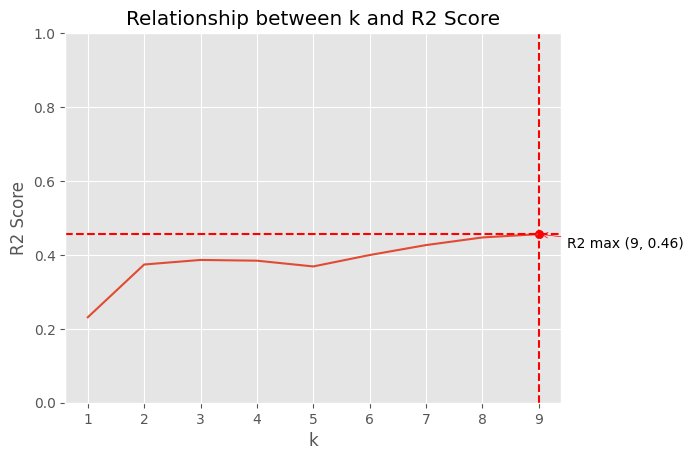

In [524]:
# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu X
X_train_transformed = column_transformer.fit_transform(X_train)
# Áp dụng chuyển đổi trên dữ liệu kiểm tra
X_val_transformed = column_transformer.transform(X_val)
# Tìm kiếm giá trị tối ưu cho siêu tham số k
best_score = -float('inf')
best_k = None
# Lưu các giá trị k và R2 vào các danh sách
k_values = []
r2_scores = []

for k in range(1, 10):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    # cv_scores = cross_val_score(knn_model, X_train_transformed, y_train, cv=5, scoring='r2')
    # mean_score = cv_scores.mean()
    y_val_pred = knn_model.fit(X_train_transformed, y_train).predict(X_val_transformed)
    val_r2 = r2_score(y_val, y_val_pred)

    k_values.append(k)
    r2_scores.append(val_r2)

    print("k:", k, "   R2:", val_r2)
    
    if test_r2 > best_score:
        best_score = val_r2
        best_k = k

print("Best k:", best_k)
print("Best R2 score:", best_score)

# Vẽ đồ thị
plt.plot(k_values, r2_scores)
plt.xlabel('k')
plt.ylabel('R2 Score')
plt.title('Relationship between k and R2 Score')
plt.ylim(0, 1)  # Chia giá trị R2 từ 0 đến 1 trên trục y
# Chia nhỏ trục x với cỡ chia 1 đơn vị
plt.xticks(np.arange(min(k_values), max(k_values)+1, 1))
for i in range(len(k_values)):
    k = k_values[i]
    val_r2 = r2_scores[i]

    if test_r2 > best_score:
        best_score = val_r2
        best_k = k

# Đánh dấu điểm R2 tối đa
plt.scatter(best_k, best_score, color='red')
plt.annotate(f'R2 max ({best_k}, {best_score:.2f})', (best_k, best_score), xytext=(20, -10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->", color='red'))
# Vẽ đường gióng xuống các trục đồ thị cho điểm tối đa
plt.axvline(x=best_k, color='red', linestyle='--')
plt.axhline(y=best_score, color='red', linestyle='--')


plt.show()

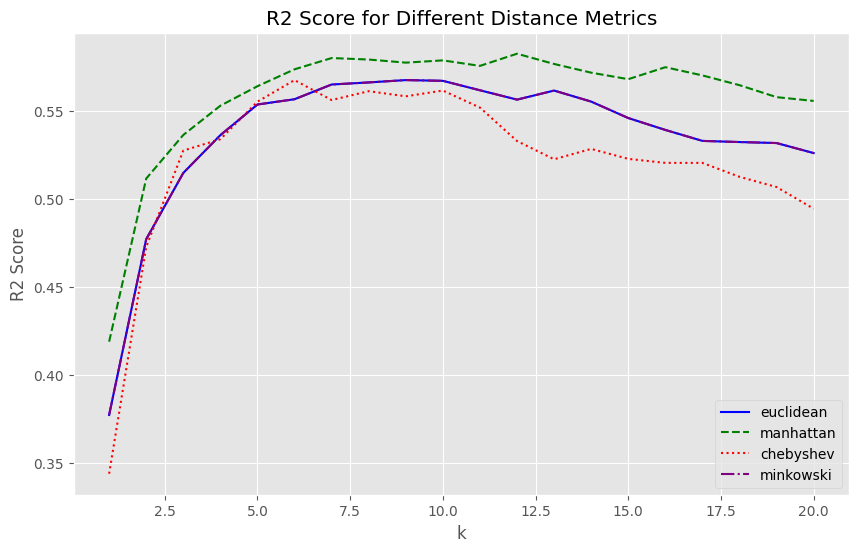

In [525]:
# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu X
X_train_transformed = column_transformer.fit_transform(X_train)

# Các hàm đo khoảng cách cần được so sánh
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# Các giá trị k
k_values = range(1, 21)

# Tạo một danh sách để lưu kết quả R2 scores
r2_scores = {}

# Các kiểu đường và màu sắc tương ứng
line_styles = ['-', '--', ':', '-.']
colors = ['blue', 'green', 'red', 'purple']

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
for i, metric in enumerate(distance_metrics):
    knn_model = KNeighborsRegressor(metric=metric)
    scores = []
    for k in k_values:
        knn_model.set_params(n_neighbors=k)
        cv_scores = cross_val_score(knn_model, X_train_transformed, y_train, cv=5, scoring='r2')
        scores.append(cv_scores.mean())
    r2_scores[metric] = scores
    plt.plot(k_values, r2_scores[metric], label=metric, linestyle=line_styles[i], color=colors[i])

plt.xlabel('k')
plt.ylabel('R2 Score')
plt.title('R2 Score for Different Distance Metrics')
plt.legend()
plt.show()

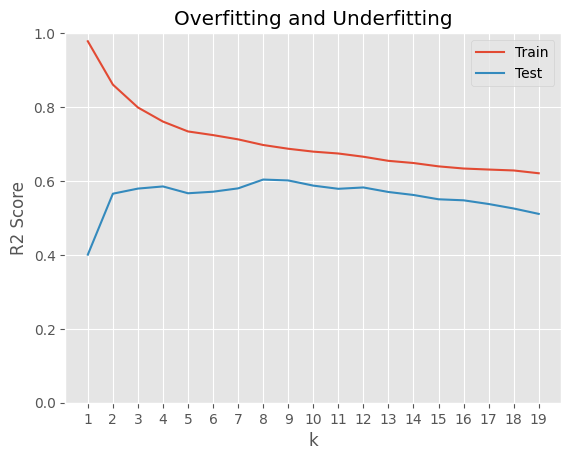

In [526]:
# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu huấn luyện
X_train_transformed = column_transformer.fit_transform(X_train)

# Áp dụng chuyển đổi trên dữ liệu kiểm tra
X_test_transformed = column_transformer.transform(X_test)


# Danh sách các giá trị k
k_values = range(1, 20)

# Danh sách R2 scores trên tập huấn luyện và tập kiểm tra
train_scores = []
test_scores = []

for k in k_values:
    # Tạo mô hình kNN với giá trị k hiện tại
    knn_model = KNeighborsRegressor(n_neighbors=k)
    
    # Huấn luyện mô hình trên tập huấn luyện
    knn_model.fit(X_train_transformed, y_train)
    
    # Dự đoán trên tập huấn luyện và tập kiểm tra
    y_train_pred = knn_model.predict(X_train_transformed)
    y_test_pred = knn_model.predict(X_test_transformed)
    
    # Tính R2 score trên tập huấn luyện và tập kiểm tra
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)
    
    # Lưu R2 scores vào danh sách
    train_scores.append(train_score)
    test_scores.append(test_score)

# Vẽ đồ thị R2 scores
plt.plot(k_values, train_scores, label='Train')
plt.plot(k_values, test_scores, label='Test')
plt.xlabel('k')
plt.ylabel('R2 Score')
plt.title('Overfitting and Underfitting')
plt.legend()

# Chia nhỏ trục x với cỡ chia 1 đơn vị
plt.xticks(np.arange(min(k_values), max(k_values)+1, 1))
plt.ylim(0, 1)
plt.show()


In [527]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[1, 2, 7, 10, 12])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=9, metric = 'manhattan')



pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

R2 score 0.5946493694366999


In [528]:
from sklearn.model_selection import cross_val_score
# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu X
X_transformed = column_transformer.fit_transform(X)

# Tạo mô hình kNN với số hàng xóm là 3
knn_model = KNeighborsRegressor(n_neighbors=9, metric = 'manhattan')

# Áp dụng cross-validation và tính R2 score trên 5 fold
cv_scores = cross_val_score(knn_model, X_transformed, y, cv=5, scoring='r2')

# In ra các kết quả cross-validation
print("Cross-validation scores (R2 for each fold):", cv_scores)
print("Mean R2 score:", cv_scores.mean())

Cross-validation scores (R2 for each fold): [0.53852637 0.48192582 0.47829378 0.53052377 0.62490125]
Mean R2 score: 0.5308342012217382


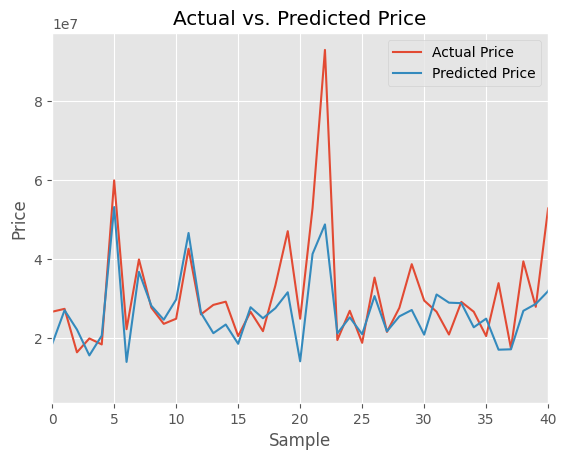

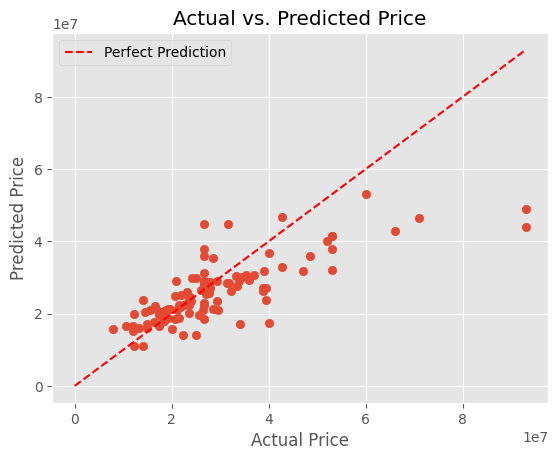

In [529]:

# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu huấn luyện
X_train_transformed = column_transformer.fit_transform(X_train)

# Áp dụng chuyển đổi trên dữ liệu kiểm tra
X_test_transformed = column_transformer.transform(X_test)


# Danh sách các giá trị k
k_values = range(1, 20)

# Danh sách R2 scores trên tập huấn luyện và tập kiểm tra
train_scores = []
test_scores = []

# Tạo mô hình kNN với giá trị k hiện tại
knn_model = KNeighborsRegressor(n_neighbors=9)
    
# Huấn luyện mô hình trên tập huấn luyện
knn_model.fit(X_train_transformed, y_train)
    
# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = knn_model.predict(X_train_transformed)
y_test_pred = knn_model.predict(X_test_transformed)
    
# Tính R2 score trên tập huấn luyện và tập kiểm tra
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)
    
# Lưu R2 scores vào danh sách
train_scores.append(train_score)
test_scores.append(test_score)

# # Vẽ đồ thị R2 scores
# plt.plot(k_values, train_scores, label='Train')
# plt.plot(k_values, test_scores, label='Test')
# plt.xlabel('k')
# plt.ylabel('R2 Score')
# plt.title('Overfitting and Underfitting')
# plt.legend()


# Chuẩn bị dữ liệu
x_values = range(len(y_test))
y_true = np.exp(y_test)  # Chuyển đổi giá trị log về giá chính xác
y_pred = np.exp(y_test_pred)  # Chuyển đổi giá trị log về giá dự đoán

# Vẽ đồ thị
plt.plot(x_values, y_true, label='Actual Price')
plt.plot(x_values, y_pred, label='Predicted Price')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price')
plt.legend()

# Đặt giới hạn cho trục x
plt.xlim(0, 40)


plt.show()

# Vẽ đồ thị scatter
plt.scatter(y_true, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')

# Vẽ đường thẳng y = x để so sánh
max_value = max(np.max(y_true), np.max(y_pred))
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.legend()
plt.show()



In [530]:
import time

# Xác định các cột cần chuyển đổi
columns_to_encode = [1, 2, 7, 10, 12]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu huấn luyện
X_train_transformed = column_transformer.fit_transform(X_train)

# Áp dụng chuyển đổi trên dữ liệu kiểm tra
X_test_transformed = column_transformer.transform(X_test)
# Tạo mô hình kNN với giá trị k hiện tại
knn_model = KNeighborsRegressor(n_neighbors=9, metric = 'manhattan')
    
start_training_time = time.time()
knn_model.fit(X_train_transformed, y_train)
end_training_time = time.time()
training_time = end_training_time - start_training_time

start_prediction_time = time.time()
y_train_pred = knn_model.predict(X_train_transformed)
y_test_pred = knn_model.predict(X_test_transformed)
end_prediction_time = time.time()
prediction_time = end_prediction_time - start_prediction_time

start_time = time.time()
y_pred = knn_model.predict(X_test_transformed)
end_time = time.time()
total_runtime = end_time - start_time

print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")
print("Total runtime:", total_runtime, "seconds")

Training time: 0.004985809326171875 seconds
Prediction time: 0.08377313613891602 seconds
Total runtime: 0.01196908950805664 seconds


### Exporting the Model

In [554]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))
pickle.dump(pipe1,open('pipe1.pkl','wb'))

In [555]:
df

,Comment_count,Price,Brand,cpu_brand,ram_size,storage_size,displ_rate,Battery,OS,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,ppi
0,906,28626333.33,acer,intel,8,512,144,57.000000,windows 10,2.20,1,ips,1,nvidia,141.211998
1,400,21259666.67,msi,intel,8,512,60,39.000000,windows 10,1.30,1,ips,0,nvidia,157.350512
2,322,15294500.00,dell,intel,4,256,60,41.000000,windows 10,1.70,1,va,1,intel,141.211998
3,378,14999000.00,lenovo,intel,8,512,60,57.654098,windows 10,1.65,1,led,1,intel,141.211998
4,1244,18799000.00,lenovo,intel,16,512,60,45.000000,windows 10,1.66,1,ips,1,intel,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,39,26990000.00,microsoft,amd,8,256,60,47.000000,windows 10,1.27,0,ips,0,amd,200.842560
548,21,14990000.00,microsoft,intel,4,64,60,57.654098,windows 10,1.11,0,ips,0,intel,148.874375
549,76,21590000.00,microsoft,intel,8,256,60,57.654098,windows 10,1.11,0,ips,0,intel,148.874375
550,49,15990000.00,microsoft,intel,4,128,60,43.000000,windows 10,0.00,0,ips,0,intel,267.338436


In [556]:
X_train

,Comment_count,Brand,cpu_brand,ram_size,storage_size,displ_rate,Battery,OS,Weight,ram_upgradable,screen_technology,storage_extra_slot,GPU_brand,ppi
369,71,asus,intel,8,512,60,42.000000,windows 10,1.500,0,ips,0,intel,157.350512
170,1518,msi,amd,8,512,60,65.000000,windows 10,1.300,1,led,1,amd,157.350512
148,460,acer,amd,8,512,144,57.000000,windows 10,2.200,1,ips,1,nvidia,141.211998
29,19,msi,intel,16,512,144,150.000000,windows 10,1.693,1,ips,1,nvidia,141.211998
215,3,lg,intel,16,512,60,80.000000,windows 10,1.350,0,ips,1,intel,177.580821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,16,asus,intel,4,128,60,57.654098,windows 10,1.050,0,tn,1,intel,135.094211
535,6,msi,intel,8,512,60,52.000000,windows 10,1.290,0,ips,1,nvidia,157.350512
494,0,lenovo,intel,8,512,165,60.000000,windows 10,2.400,1,ips,1,nvidia,141.211998
528,0,msi,intel,8,512,60,52.000000,windows 10,1.300,1,ips,0,nvidia,157.350512


In [557]:
df.dtypes


Comment_count           int64
Price                 float64
Brand                  object
cpu_brand              object
ram_size                int64
                       ...   
ram_upgradable          int64
screen_technology      object
storage_extra_slot      int64
GPU_brand              object
ppi                   float64
Length: 15, dtype: object